In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import fasttext
import fasttext.util
import string
import re
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sys

In [2]:
data = pd.read_csv("The-Office-Lines-V2.csv")
data.head(10)

season  episode  title  scene  speaker  \
0       1        1  Pilot      1  Michael   
1       1        1  Pilot      1      Jim   
2       1        1  Pilot      1  Michael   
3       1        1  Pilot      1      Jim   
4       1        1  Pilot      1  Michael   
5       1        1  Pilot      2  Michael   
6       1        1  Pilot      3  Michael   
7       1        1  Pilot      3      Pam   
8       1        1  Pilot      3  Michael   
9       1        1  Pilot      3      Pam   

                                                line  
0  All right Jim. Your quarterlies look very good...  
1         Oh, I told you. I couldn't close it. So...  
2  So you've come to the master for guidance? Is ...  
3         Actually, you called me in here, but yeah.  
4    All right. Well, let me show you how it's done.  
5   Yes, I'd like to speak to your office manager...  
6  I've, uh, I've been at Dunder Mifflin for 12 y...  
7                                Well. I don't know.  
8  If you think she's cute now, you should have s...  
9                                              What?

In [3]:
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
data['clean_msg']= data['line'].apply(lambda x:remove_punctuation(x))
#data.clean_msg[]
data.head()

season  episode  title  scene  speaker  \
0       1        1  Pilot      1  Michael   
1       1        1  Pilot      1      Jim   
2       1        1  Pilot      1  Michael   
3       1        1  Pilot      1      Jim   
4       1        1  Pilot      1  Michael   

                                                line  \
0  All right Jim. Your quarterlies look very good...   
1         Oh, I told you. I couldn't close it. So...   
2  So you've come to the master for guidance? Is ...   
3         Actually, you called me in here, but yeah.   
4    All right. Well, let me show you how it's done.   

                                           clean_msg  
0  All right Jim Your quarterlies look very good ...  
1                Oh I told you I couldnt close it So  
2  So youve come to the master for guidance Is th...  
3            Actually you called me in here but yeah  
4        All right Well let me show you how its done

In [4]:
#data.line.replace('',np.nan, inplace=True)
#data.dropna(subset=['line'], inplace=True)

In [5]:
data['msg_lower']= data['clean_msg'].apply(lambda x: x.lower())

def tokenization(text):
    tokens = re.split('W+',text)
    return tokens
data['msg_tokenied']= data['msg_lower'].apply(lambda x: tokenization(x))
data.head()

season  episode  title  scene  speaker  \
0       1        1  Pilot      1  Michael   
1       1        1  Pilot      1      Jim   
2       1        1  Pilot      1  Michael   
3       1        1  Pilot      1      Jim   
4       1        1  Pilot      1  Michael   

                                                line  \
0  All right Jim. Your quarterlies look very good...   
1         Oh, I told you. I couldn't close it. So...   
2  So you've come to the master for guidance? Is ...   
3         Actually, you called me in here, but yeah.   
4    All right. Well, let me show you how it's done.   

                                           clean_msg  \
0  All right Jim Your quarterlies look very good ...   
1                Oh I told you I couldnt close it So   
2  So youve come to the master for guidance Is th...   
3            Actually you called me in here but yeah   
4        All right Well let me show you how its done   

                                           msg_lower  \
0  all right jim your quarterlies look very good ...   
1                oh i told you i couldnt close it so   
2  so youve come to the master for guidance is th...   
3            actually you called me in here but yeah   
4        all right well let me show you how its done   

                                        msg_tokenied  
0  [all right jim your quarterlies look very good...  
1              [oh i told you i couldnt close it so]  
2  [so youve come to the master for guidance is t...  
3          [actually you called me in here but yeah]  
4      [all right well let me show you how its done]

In [6]:
data1=pd.DataFrame()


In [7]:
data1['msg_lower']=data['msg_lower']
data1.to_csv('try_ft.csv')
data1

msg_lower
0      all right jim your quarterlies look very good ...
1                    oh i told you i couldnt close it so
2      so youve come to the master for guidance is th...
3                actually you called me in here but yeah
4            all right well let me show you how its done
...                                                  ...
54162  it all seems so very arbitrary i applied for a...
54163  i just feel lucky that i got a chance to share...
54164  im happy that this was all filmed so i can rem...
54165  i sold paper at this company for 12 years my j...
54166  i thought it was weird when you picked us to m...

[54167 rows x 1 columns]

In [8]:
data1

msg_lower
0      all right jim your quarterlies look very good ...
1                    oh i told you i couldnt close it so
2      so youve come to the master for guidance is th...
3                actually you called me in here but yeah
4            all right well let me show you how its done
...                                                  ...
54162  it all seems so very arbitrary i applied for a...
54163  i just feel lucky that i got a chance to share...
54164  im happy that this was all filmed so i can rem...
54165  i sold paper at this company for 12 years my j...
54166  i thought it was weird when you picked us to m...

[54167 rows x 1 columns]

In [9]:
data1.msg_lower.isnull().sum()

0

In [10]:
model=fasttext.train_unsupervised('try_ft.csv')


Read 0M words
Number of words:  5156
Number of labels: 0
Progress: 100.0% words/sec/thread:  136434 lr:  0.000000 avg.loss:  2.526936 ETA:   0h 0m 0s


In [11]:
def fasttext_sentence_vec(data,column):
    ft_sentence_dict={}
    for sentence in data[column]:
        #print(sentence)
        ft_sentence_dict[sentence]=model.get_sentence_vector(sentence)

    return ft_sentence_dict

fasttext_sentence_vec(data1,column='msg_lower')

{'all right jim your quarterlies look very good how are things at the library': array([ 0.08409322, -0.0163515 , -0.02680739, -0.00511866,  0.07807907,
         0.04259828, -0.09915881, -0.01923938, -0.04969174,  0.14458679,
         0.03027829,  0.007767  , -0.01650304, -0.05307953,  0.02130489,
        -0.07641777, -0.07487063, -0.05214677,  0.02125333, -0.14423406,
        -0.07707282, -0.03284244,  0.02631486, -0.19452573,  0.0178369 ,
        -0.06941666,  0.06254103,  0.10234389, -0.10006128,  0.10224316,
         0.01884891, -0.05710495, -0.05299581, -0.04367463, -0.05717007,
        -0.01520103, -0.07232337, -0.07008248, -0.07943629,  0.00564416,
        -0.02326034,  0.16036554, -0.00064271,  0.0951195 , -0.12660529,
         0.01259067,  0.01002586, -0.04109384, -0.03190988, -0.00655855,
        -0.15477517, -0.01908148, -0.02515463,  0.03583305, -0.08995787,
        -0.0267435 , -0.1024624 ,  0.14296347,  0.14968096,  0.0345158 ,
         0.01169626,  0.09698914,  0.17960392

In [12]:
M_S_V = pd.DataFrame(fasttext_sentence_vec(data1,column='msg_lower').items(), columns = ('sentences', 'vectors'))
M_S_V

sentences  \
0      all right jim your quarterlies look very good ...   
1                    oh i told you i couldnt close it so   
2      so youve come to the master for guidance is th...   
3                actually you called me in here but yeah   
4            all right well let me show you how its done   
...                                                  ...   
45578  it all seems so very arbitrary i applied for a...   
45579  i just feel lucky that i got a chance to share...   
45580  im happy that this was all filmed so i can rem...   
45581  i sold paper at this company for 12 years my j...   
45582  i thought it was weird when you picked us to m...   

                                                 vectors  
0      [0.08409322, -0.016351504, -0.026807386, -0.00...  
1      [0.08301078, -0.15757197, -0.03916316, -0.0169...  
2      [0.09175323, -0.033610232, -0.041109443, -0.01...  
3      [0.11686664, -0.12342338, -0.071085334, -0.049...  
4      [0.09132248, -0.07925578, -0.063093916, -0.073...  
...                                                  ...  
45578  [0.08274744, -0.043810982, -0.030597176, -0.02...  
45579  [0.0746802, -0.06833781, -0.028825581, -0.0232...  
45580  [0.11064598, -0.094286226, -0.011822337, -0.01...  
45581  [0.083425246, -0.06955151, -0.01113774, -0.005...  
45582  [0.08750088, -0.05161395, -0.015713878, -0.004...  

[45583 rows x 2 columns]

In [13]:
split_MS_V = pd.DataFrame(M_S_V['vectors'].to_list())
split_MS_V

0         1         2         3         4         5         6   \
0      0.084093 -0.016352 -0.026807 -0.005119  0.078079  0.042598 -0.099159   
1      0.083011 -0.157572 -0.039163 -0.016932  0.101196  0.006635 -0.159647   
2      0.091753 -0.033610 -0.041109 -0.018774  0.073284  0.008396 -0.082762   
3      0.116867 -0.123423 -0.071085 -0.049868  0.074574  0.019154 -0.077110   
4      0.091322 -0.079256 -0.063094 -0.073344  0.087845  0.060469 -0.109242   
...         ...       ...       ...       ...       ...       ...       ...   
45578  0.082747 -0.043811 -0.030597 -0.023451  0.068756  0.014581 -0.097835   
45579  0.074680 -0.068338 -0.028826 -0.023211  0.059185 -0.002720 -0.092704   
45580  0.110646 -0.094286 -0.011822 -0.010394  0.068296 -0.008861 -0.117530   
45581  0.083425 -0.069552 -0.011138 -0.005755  0.070568 -0.011297 -0.109289   
45582  0.087501 -0.051614 -0.015714 -0.004587  0.082771  0.020419 -0.064199   

             7         8         9   ...        90        91        92  \
0     -0.019239 -0.049692  0.144587  ... -0.012689 -0.025722  0.164367   
1      0.014043 -0.031880  0.222080  ...  0.034436  0.010191  0.153668   
2     -0.009762 -0.060142  0.152341  ... -0.011982 -0.028122  0.176703   
3     -0.006412 -0.024312  0.161806  ... -0.008524  0.018948  0.185947   
4      0.033399 -0.044795  0.204036  ...  0.040636  0.034449  0.178199   
...         ...       ...       ...  ...       ...       ...       ...   
45578  0.011455 -0.049965  0.162016  ...  0.006479 -0.007410  0.167825   
45579  0.000681 -0.059363  0.142076  ...  0.002497 -0.031265  0.177257   
45580  0.010481 -0.055270  0.178062  ...  0.006849 -0.003351  0.169302   
45581  0.012804 -0.058575  0.163736  ...  0.013918  0.005378  0.176117   
45582  0.002883 -0.050012  0.153041  ...  0.002114 -0.005192  0.179769   

             93        94        95        96        97        98        99  
0     -0.151139  0.039625 -0.055664  0.064862  0.078485 -0.059234 -0.013030  
1     -0.185949  0.095597 -0.067273  0.045053  0.100167  0.020872 -0.048237  
2     -0.137515  0.076648 -0.047642  0.042047  0.074762 -0.068410 -0.057117  
3     -0.145254  0.080538 -0.067957  0.057859  0.080745 -0.022001 -0.039736  
4     -0.164301  0.065194 -0.031211  0.066080  0.092880 -0.035658 -0.015267  
...         ...       ...       ...       ...       ...       ...       ...  
45578 -0.149222  0.071161 -0.043828  0.046165  0.079825 -0.036127 -0.036042  
45579 -0.144570  0.072869 -0.067669  0.038778  0.082952 -0.035203 -0.041737  
45580 -0.126015  0.084429 -0.053030  0.052110  0.073817 -0.037787 -0.034978  
45581 -0.140668  0.082917 -0.056675  0.030450  0.073063 -0.055194 -0.049892  
45582 -0.162153  0.071387 -0.067203  0.015193  0.070693 -0.074739 -0.040968  

[45583 rows x 100 columns]

In [14]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(split_MS_V.iloc[:, 1:])

In [15]:
wcss = []
for i in range(1, 55, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(split_MS_V)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 51

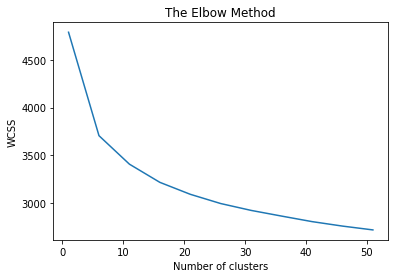

In [16]:
plt.plot(range(1, 55, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [17]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)


0
1


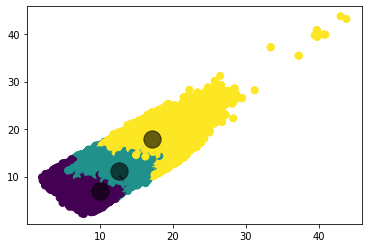

In [19]:
for i in range(0,2) :
    print(i)
    x=y_kmeans[: ,i]
    y= y_kmeans[: ,i+1]
    plt.scatter(x, y,c=prediction,s=50 , cmap='viridis')

    centers2 = fitted.cluster_centers_
    plt.scatter(centers2[:, i], centers2[:, i+1],c='black', s=300, alpha=0.6)


In [35]:
sentences = M_S_V["sentences"]

In [36]:
split_MS_V = split_MS_V.join(sentences)
split_MS_V

0         1         2         3         4         5         6  \
0      0.046850  0.136773 -0.054572 -0.007928  0.093815 -0.018113 -0.150576   
1      0.096403  0.154517 -0.021236 -0.068983  0.115747 -0.028597 -0.138236   
2      0.026756  0.164295 -0.039549 -0.018756  0.113040  0.009635 -0.155115   
3      0.067658  0.149428 -0.054977 -0.039520  0.127042 -0.029538 -0.123394   
4      0.067815  0.164047 -0.054094 -0.042904  0.112856 -0.045625 -0.135376   
...         ...       ...       ...       ...       ...       ...       ...   
45578  0.065462  0.146914 -0.035150 -0.041118  0.105227 -0.014860 -0.176081   
45579  0.048362  0.135637 -0.004028 -0.044171  0.114513 -0.011344 -0.167925   
45580  0.049990  0.147239 -0.027449 -0.066565  0.123229 -0.019448 -0.139475   
45581  0.049621  0.141258 -0.012234 -0.065851  0.118837 -0.006752 -0.139883   
45582  0.068252  0.155118 -0.032413 -0.045881  0.114872 -0.003408 -0.146267   

              7         8         9  ...        91        92        93  \
0     -0.089544  0.024398  0.082784  ... -0.018280  0.129967 -0.035815   
1     -0.035846  0.030485  0.037143  ...  0.038011  0.121203  0.021949   
2     -0.084114  0.024688  0.070817  ...  0.032387  0.156416 -0.039871   
3     -0.084861  0.038475  0.057335  ...  0.040684  0.178821 -0.016772   
4     -0.118408  0.077686  0.079485  ... -0.009467  0.108083  0.009244   
...         ...       ...       ...  ...       ...       ...       ...   
45578 -0.091472  0.024465  0.071074  ...  0.023219  0.137741 -0.032377   
45579 -0.084910  0.035799  0.078344  ...  0.037338  0.156622 -0.035934   
45580 -0.069735  0.032135  0.046184  ...  0.033185  0.143333 -0.009856   
45581 -0.078919  0.039419  0.057797  ...  0.042183  0.152797 -0.010767   
45582 -0.087307  0.009262  0.069240  ...  0.034519  0.138547 -0.048037   

             94        95        96        97        98        99  \
0     -0.054796 -0.058439  0.009874  0.106733 -0.039128 -0.143860   
1      0.077898 -0.034000 -0.002635  0.118105 -0.062441 -0.122890   
2     -0.025113 -0.046868  0.031336  0.107087 -0.050248 -0.135489   
3     -0.006843 -0.037133  0.003478  0.087132 -0.028785 -0.109911   
4     -0.005433  0.008278  0.022043  0.076295  0.006672 -0.088486   
...         ...       ...       ...       ...       ...       ...   
45578 -0.020166 -0.050061  0.017558  0.073496 -0.052955 -0.135965   
45579 -0.019712 -0.042775  0.020398  0.067885 -0.069894 -0.130994   
45580 -0.000261 -0.052727  0.037802  0.094786 -0.024190 -0.119322   
45581 -0.011088 -0.050872  0.029174  0.102749 -0.038159 -0.117315   
45582 -0.045862 -0.072883  0.014821  0.092621 -0.053535 -0.128487   

                                               sentences  
0      all right jim your quarterlies look very good ...  
1                    oh i told you i couldnt close it so  
2      so youve come to the master for guidance is th...  
3                actually you called me in here but yeah  
4            all right well let me show you how its done  
...                                                  ...  
45578  it all seems so very arbitrary i applied for a...  
45579  i just feel lucky that i got a chance to share...  
45580  im happy that this was all filmed so i can rem...  
45581  i sold paper at this company for 12 years my j...  
45582  i thought it was weird when you picked us to m...  

[45583 rows x 101 columns]

In [37]:
split_MS_V['CLUSTERS'] = kmeans.labels_
split_MS_V.to_csv("cluster_fts_vectors.csv",index=False)

In [38]:
split_MS_V

0         1         2         3         4         5         6  \
0      0.046850  0.136773 -0.054572 -0.007928  0.093815 -0.018113 -0.150576   
1      0.096403  0.154517 -0.021236 -0.068983  0.115747 -0.028597 -0.138236   
2      0.026756  0.164295 -0.039549 -0.018756  0.113040  0.009635 -0.155115   
3      0.067658  0.149428 -0.054977 -0.039520  0.127042 -0.029538 -0.123394   
4      0.067815  0.164047 -0.054094 -0.042904  0.112856 -0.045625 -0.135376   
...         ...       ...       ...       ...       ...       ...       ...   
45578  0.065462  0.146914 -0.035150 -0.041118  0.105227 -0.014860 -0.176081   
45579  0.048362  0.135637 -0.004028 -0.044171  0.114513 -0.011344 -0.167925   
45580  0.049990  0.147239 -0.027449 -0.066565  0.123229 -0.019448 -0.139475   
45581  0.049621  0.141258 -0.012234 -0.065851  0.118837 -0.006752 -0.139883   
45582  0.068252  0.155118 -0.032413 -0.045881  0.114872 -0.003408 -0.146267   

              7         8         9  ...        92        93        94  \
0     -0.089544  0.024398  0.082784  ...  0.129967 -0.035815 -0.054796   
1     -0.035846  0.030485  0.037143  ...  0.121203  0.021949  0.077898   
2     -0.084114  0.024688  0.070817  ...  0.156416 -0.039871 -0.025113   
3     -0.084861  0.038475  0.057335  ...  0.178821 -0.016772 -0.006843   
4     -0.118408  0.077686  0.079485  ...  0.108083  0.009244 -0.005433   
...         ...       ...       ...  ...       ...       ...       ...   
45578 -0.091472  0.024465  0.071074  ...  0.137741 -0.032377 -0.020166   
45579 -0.084910  0.035799  0.078344  ...  0.156622 -0.035934 -0.019712   
45580 -0.069735  0.032135  0.046184  ...  0.143333 -0.009856 -0.000261   
45581 -0.078919  0.039419  0.057797  ...  0.152797 -0.010767 -0.011088   
45582 -0.087307  0.009262  0.069240  ...  0.138547 -0.048037 -0.045862   

             95        96        97        98        99  \
0     -0.058439  0.009874  0.106733 -0.039128 -0.143860   
1     -0.034000 -0.002635  0.118105 -0.062441 -0.122890   
2     -0.046868  0.031336  0.107087 -0.050248 -0.135489   
3     -0.037133  0.003478  0.087132 -0.028785 -0.109911   
4      0.008278  0.022043  0.076295  0.006672 -0.088486   
...         ...       ...       ...       ...       ...   
45578 -0.050061  0.017558  0.073496 -0.052955 -0.135965   
45579 -0.042775  0.020398  0.067885 -0.069894 -0.130994   
45580 -0.052727  0.037802  0.094786 -0.024190 -0.119322   
45581 -0.050872  0.029174  0.102749 -0.038159 -0.117315   
45582 -0.072883  0.014821  0.092621 -0.053535 -0.128487   

                                               sentences  CLUSTERS  
0      all right jim your quarterlies look very good ...         1  
1                    oh i told you i couldnt close it so         0  
2      so youve come to the master for guidance is th...         1  
3                actually you called me in here but yeah         1  
4            all right well let me show you how its done         1  
...                                                  ...       ...  
45578  it all seems so very arbitrary i applied for a...         1  
45579  i just feel lucky that i got a chance to share...         1  
45580  im happy that this was all filmed so i can rem...         1  
45581  i sold paper at this company for 12 years my j...         1  
45582  i thought it was weird when you picked us to m...         1  

[45583 rows x 102 columns]

In [39]:
dfs = split_MS_V[['sentences', 'CLUSTERS']].copy()
dfs

sentences  CLUSTERS
0      all right jim your quarterlies look very good ...         1
1                    oh i told you i couldnt close it so         0
2      so youve come to the master for guidance is th...         1
3                actually you called me in here but yeah         1
4            all right well let me show you how its done         1
...                                                  ...       ...
45578  it all seems so very arbitrary i applied for a...         1
45579  i just feel lucky that i got a chance to share...         1
45580  im happy that this was all filmed so i can rem...         1
45581  i sold paper at this company for 12 years my j...         1
45582  i thought it was weird when you picked us to m...         1

[45583 rows x 2 columns]

In [40]:
dfs.to_csv("cluster_ft_vectors.csv",index=False)

CLUSTER no.0


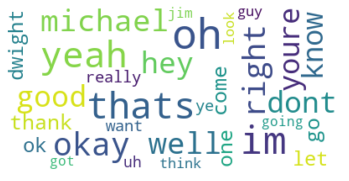

CLUSTER no.1


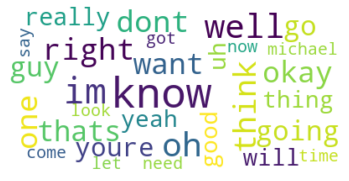

CLUSTER no.2


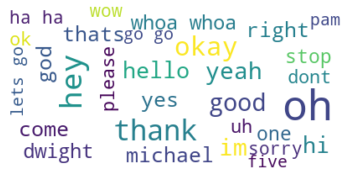

In [43]:
for i in range(0,3):
    word=" ".join(line for line in (dfs[dfs['CLUSTERS']==i].sentences.values))
    WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
    print('CLUSTER no.{}'.format(i))
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()
    i+=1


In [44]:
dfs.sentences.unique()

array(['all right jim your quarterlies look very good how are things at the library',
       'oh i told you i couldnt close it so',
       'so youve come to the master for guidance is this what youre saying grasshopper',
       ...,
       'im happy that this was all filmed so i can remember everyone and what we did i worked for a paper company all these years and i never wrote anything down',
       'i sold paper at this company for 12 years my job was to speak to clients on the phone about quantities and types of copier paper even if i didnt love every minute of it everything i have i owe to this job this stupidwonderfulboringamazing job',
       'i thought it was weird when you picked us to make a documentary but all in alli think an ordinary paper company like dunder mifflin was a great subject for a documentary theres a lot of beauty in ordinary things isnt that kind of the point'],
      dtype=object)

In [84]:
Sent=[]
Sent= " ".join(dfs[dfs['CLUSTERS']==0].sentences).split()
Sent


['oh',
 'i',
 'told',
 'you',
 'i',
 'couldnt',
 'close',
 'it',
 'so',
 'well',
 'i',
 'dont',
 'know',
 'you',
 'havent',
 'told',
 'me',
 'its',
 'called',
 'the',
 'wastepaper',
 'basket',
 'look',
 'at',
 'that',
 'look',
 'at',
 'that',
 'face',
 'shall',
 'i',
 'play',
 'for',
 'you',
 'pa',
 'rum',
 'pump',
 'um',
 'pum',
 'i',
 'have',
 'no',
 'gifts',
 'for',
 'you',
 'pa',
 'rum',
 'pump',
 'um',
 'pum',
 'whassup',
 'whassup',
 'i',
 'still',
 'love',
 'that',
 'after',
 'seven',
 'years',
 'ok',
 'all',
 'right',
 'see',
 'you',
 'later',
 'all',
 'right',
 'take',
 'care',
 'back',
 'to',
 'work',
 'what',
 'im',
 'sorry',
 'i',
 'didnt',
 'get',
 'any',
 'agenda',
 'uh',
 'yeah',
 'the',
 'one',
 'do',
 'you',
 'want',
 'to',
 'look',
 'at',
 'mine',
 'yeah',
 'yeah',
 'lovely',
 'thank',
 'you',
 'michael',
 'dont',
 'panic',
 'no',
 'no',
 'no',
 'no',
 'this',
 'is',
 'good',
 'this',
 'is',
 'good',
 'this',
 'is',
 'fine',
 'excellent',
 'no',
 'no',
 'no',
 'michae

In [85]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    return [i for i in text if i not in stopwords]

Sent=remove_stopwords(Sent)


In [86]:
count={}
for word in Sent:
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count

{'oh': 908,
 'told': 56,
 'couldnt': 20,
 'close': 29,
 'well': 410,
 'dont': 742,
 'know': 518,
 'havent': 36,
 'called': 35,
 'wastepaper': 1,
 'basket': 5,
 'look': 182,
 'face': 21,
 'shall': 8,
 'play': 34,
 'pa': 6,
 'rum': 5,
 'pump': 2,
 'um': 141,
 'pum': 17,
 'gifts': 1,
 'whassup': 2,
 'still': 75,
 'love': 133,
 'seven': 18,
 'years': 46,
 'ok': 298,
 'right': 473,
 'see': 206,
 'later': 54,
 'take': 158,
 'care': 26,
 'back': 233,
 'work': 100,
 'im': 894,
 'sorry': 178,
 'didnt': 169,
 'get': 401,
 'agenda': 4,
 'uh': 256,
 'yeah': 704,
 'one': 319,
 'want': 284,
 'mine': 21,
 'lovely': 6,
 'thank': 215,
 'michael': 461,
 'panic': 4,
 'good': 479,
 'fine': 107,
 'excellent': 15,
 'listen': 22,
 'made': 38,
 'decided': 9,
 'alarm': 4,
 'bells': 1,
 'kind': 62,
 'going': 269,
 'ringiedingieding': 1,
 'problem': 34,
 'packman': 2,
 'hey': 542,
 'big': 92,
 'queen': 5,
 'thats': 667,
 'appropriate': 3,
 'mean': 111,
 'god': 193,
 'horrifying': 3,
 'horrible': 10,
 'person': 2

In [87]:
ft_s= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])


sns.barplot(list(ft_s.keys()), list(ft_s.values()))


/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

In [98]:
Sent=[]
Sent= " ".join(dfs[dfs['CLUSTERS']==1].sentences).split()

stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    return [i for i in text if i not in stopwords]

Sent=remove_stopwords(Sent)


count={}
for word in Sent:
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count

{'right': 1694,
 'jim': 841,
 'quarterlies': 1,
 'look': 767,
 'good': 1239,
 'things': 417,
 'library': 1,
 'youve': 189,
 'come': 903,
 'master': 21,
 'guidance': 3,
 'youre': 1446,
 'saying': 196,
 'grasshopper': 2,
 'actually': 467,
 'called': 197,
 'yeah': 1328,
 'well': 1983,
 'let': 480,
 'show': 233,
 'done': 216,
 'yes': 684,
 'id': 279,
 'like': 2536,
 'speak': 60,
 'office': 561,
 'manager': 176,
 'please': 395,
 'hello': 150,
 'michael': 1054,
 'scott': 153,
 'regional': 40,
 'dunder': 165,
 'mifflin': 152,
 'paper': 318,
 'products': 11,
 'wanted': 314,
 'talk': 436,
 'manageramanger': 1,
 'deal': 144,
 'thank': 455,
 'much': 493,
 'sir': 64,
 'gentleman': 19,
 'scholar': 2,
 'oh': 2047,
 'im': 3268,
 'sorry': 536,
 'ok': 844,
 'mistake': 61,
 'woman': 146,
 'talking': 245,
 'low': 24,
 'voice': 48,
 'probably': 218,
 'smoker': 1,
 'thats': 1405,
 'way': 678,
 'ive': 506,
 'uh': 1015,
 '12': 21,
 'years': 255,
 'last': 335,
 'four': 101,
 'want': 1429,
 'see': 921,
 'entir

In [94]:
ft_s= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])


sns.barplot(list(ft_s.keys()), list(ft_s.values()))


/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

In [95]:
Sent=[]
Sent= " ".join(dfs[dfs['CLUSTERS']==2].sentences).split()

stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    return [i for i in text if i not in stopwords]

Sent=remove_stopwords(Sent)


count={}
for word in Sent:
    if word in count:
        count[word]+=1
    else:
        count[word]=1
count

{'messages': 1,
 'nothing': 5,
 'ok': 40,
 'go': 121,
 'ahead': 6,
 'well': 17,
 'yes': 88,
 'hey': 168,
 'mr': 21,
 'scott': 28,
 'dunder': 19,
 'mifflin': 10,
 'pam': 41,
 'downsizing': 1,
 'im': 86,
 'sorry': 52,
 'assistant': 12,
 'regional': 15,
 'manager': 17,
 'gonna': 7,
 'happen': 1,
 'dwight': 82,
 'schrute': 21,
 'yeah': 104,
 'man': 22,
 'whats': 15,
 'going': 11,
 'baby': 9,
 'right': 55,
 'postit': 1,
 'notes': 1,
 'things': 3,
 'good': 92,
 'thats': 55,
 'great': 30,
 'oh': 300,
 'roy': 5,
 'six': 19,
 'seven': 14,
 'martinez': 1,
 'thank': 42,
 'ignorance': 1,
 'lets': 50,
 'celebrate': 1,
 'um': 18,
 'brown': 1,
 'remember': 7,
 'wait': 65,
 'second': 9,
 'stop': 66,
 'wont': 16,
 'get': 27,
 'two': 48,
 'fifteenths': 1,
 'wow': 33,
 'hello': 64,
 'really': 28,
 'shes': 14,
 'cute': 9,
 'huh': 16,
 'hot': 39,
 'mmmm': 5,
 'michael': 95,
 'jimbo': 1,
 'ha': 68,
 'haaaaa': 1,
 'ah': 51,
 'gosh': 6,
 'youre': 38,
 'thing': 5,
 'workspace': 1,
 'nice': 21,
 'absolutely': 6

In [96]:
ft_s= dict(sorted(count.items(), key = itemgetter(1), reverse = True)[:10])


sns.barplot(list(ft_s.keys()), list(ft_s.values()))


/home/rutvathaker/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

In [92]:
model=fasttext.train_unsupervised('MSL.csv')
model.words


Read 0M words
Number of words:  5313
Number of labels: 0
Progress: 100.0% words/sec/thread:  139043 lr:  0.000000 avg.loss:  2.530543 ETA:   0h 0m 0s


['</s>',
 'i',
 'you',
 'the',
 'to',
 'a',
 'and',
 'it',
 'that',
 'is',
 'of',
 'no',
 'this',
 'in',
 'what',
 'me',
 'my',
 'have',
 'im',
 'just',
 'we',
 'its',
 'know',
 'so',
 'do',
 'for',
 'not',
 'oh',
 'on',
 'dont',
 'are',
 'be',
 'was',
 'your',
 'like',
 'yeah',
 'all',
 'with',
 'okay',
 'but',
 'well',
 'right',
 'get',
 'here',
 'about',
 'thats',
 'hey',
 'can',
 'go',
 'he',
 'out',
 'think',
 'good',
 'youre',
 'up',
 'at',
 'michael',
 'if',
 'one',
 'going',
 'really',
 'were',
 'want',
 'how',
 'there',
 'yes',
 'would',
 'did',
 'ok',
 'now',
 'gonna',
 'uh',
 'come',
 'dwight',
 'they',
 'got',
 'will',
 'an',
 'am',
 'her',
 'why',
 'see',
 'or',
 'jim',
 'time',
 'from',
 'some',
 'back',
 'him',
 'who',
 'because',
 'she',
 'say',
 'as',
 'need',
 'pam',
 'when',
 'could',
 'great',
 'thank',
 'cant',
 'look',
 'guys',
 'very',
 'people',
 'um',
 'then',
 'take',
 'been',
 'should',
 'little',
 'hes',
 'make',
 'our',
 'lets',
 'mean',
 'tell',
 'us',
 'h

In [108]:
stopwords = nltk.corpus.stopwords.words('english')

def remove_stopwords(text):
    return [i for i in text if i not in stopwords]

MW=remove_stopwords(model.words)

In [109]:
ft_vec=[model.get_word_vector(x) for x in MW]
ft_vec

[array([-0.25710902,  0.14975958, -0.21075521,  0.02095732,  0.2027405 ,
        -0.07156642, -0.14546284, -0.13540317,  0.17729972,  0.1489742 ,
         0.00901379,  0.19448052,  0.18147396,  0.11984818, -0.0338144 ,
         0.00306111, -0.33265296, -0.03271728,  0.01267258, -0.25218335,
        -0.11027177,  0.02514482,  0.18378371, -0.12949969,  0.0887133 ,
        -0.07107919, -0.1021146 , -0.19151844,  0.02372625,  0.17567211,
        -0.35652685,  0.3244527 , -0.27559155, -0.03873901, -0.05188584,
        -0.3334495 , -0.06662913, -0.26937526, -0.39074352,  0.06843956,
        -0.01368521,  0.15742108,  0.02244574,  0.09585169,  0.03693181,
        -0.18797085, -0.14354809, -0.21182758, -0.27521273,  0.14562857,
        -0.2725364 ,  0.3884441 , -0.31772473,  0.18585604, -0.08105849,
        -0.07682268,  0.05965299,  0.2596268 ,  0.12215538,  0.08363041,
         0.06491167,  0.02757464,  0.23209025,  0.01652488, -0.19291809,
         0.17569652, -0.37009397,  0.18394132,  0.2

In [110]:
def fasttext_word_vec():
    ft_dict={}
    for word in MW:
            ft_dict[word]=model.get_word_vector(word)
    return ft_dict
fasttext_word_vec()



{'</s>': array([-0.25710902,  0.14975958, -0.21075521,  0.02095732,  0.2027405 ,
        -0.07156642, -0.14546284, -0.13540317,  0.17729972,  0.1489742 ,
         0.00901379,  0.19448052,  0.18147396,  0.11984818, -0.0338144 ,
         0.00306111, -0.33265296, -0.03271728,  0.01267258, -0.25218335,
        -0.11027177,  0.02514482,  0.18378371, -0.12949969,  0.0887133 ,
        -0.07107919, -0.1021146 , -0.19151844,  0.02372625,  0.17567211,
        -0.35652685,  0.3244527 , -0.27559155, -0.03873901, -0.05188584,
        -0.3334495 , -0.06662913, -0.26937526, -0.39074352,  0.06843956,
        -0.01368521,  0.15742108,  0.02244574,  0.09585169,  0.03693181,
        -0.18797085, -0.14354809, -0.21182758, -0.27521273,  0.14562857,
        -0.2725364 ,  0.3884441 , -0.31772473,  0.18585604, -0.08105849,
        -0.07682268,  0.05965299,  0.2596268 ,  0.12215538,  0.08363041,
         0.06491167,  0.02757464,  0.23209025,  0.01652488, -0.19291809,
         0.17569652, -0.37009397,  0.183941

In [111]:
M_S = pd.DataFrame(fasttext_word_vec().items(), columns = ('words', 'vectors'))
M_S

words                                            vectors
0         </s>  [-0.25710902, 0.14975958, -0.21075521, 0.02095...
1           im  [-0.057954505, 0.4828667, -0.07102259, -0.1779...
2         know  [0.28291434, 0.4574532, -0.07042283, -0.019370...
3           oh  [0.10351472, 0.21486197, -0.26852652, 0.145868...
4         dont  [0.29935947, 0.45369858, -0.2749822, -0.111587...
...        ...                                                ...
5177    doobie  [0.15905878, 0.2067619, -0.12151023, -0.082297...
5178       pep  [0.07653295, 0.22779061, -0.055322457, -0.0726...
5179  pretzels  [0.19073956, 0.29371068, -0.067618415, -0.1105...
5180   flashed  [0.26243123, 0.3075644, -0.10731998, -0.121564...
5181  ceilings  [0.106768616, 0.21503437, 0.011341153, -0.0625...

[5182 rows x 2 columns]

In [112]:
split_MS = pd.DataFrame(M_S['vectors'].to_list())
split_MS

0         1         2         3         4         5         6   \
0    -0.257109  0.149760 -0.210755  0.020957  0.202741 -0.071566 -0.145463   
1    -0.057955  0.482867 -0.071023 -0.177909  0.562640  0.134707 -0.411126   
2     0.282914  0.457453 -0.070423 -0.019370  0.290619 -0.126914 -0.379807   
3     0.103515  0.214862 -0.268527  0.145868  0.121124 -0.109433 -0.014112   
4     0.299359  0.453699 -0.274982 -0.111588  0.514096 -0.146705 -0.179742   
...        ...       ...       ...       ...       ...       ...       ...   
5177  0.159059  0.206762 -0.121510 -0.082298  0.132933 -0.080092 -0.190779   
5178  0.076533  0.227791 -0.055322 -0.072652  0.086853  0.014395 -0.180176   
5179  0.190740  0.293711 -0.067618 -0.110585  0.206219 -0.060771 -0.342407   
5180  0.262431  0.307564 -0.107320 -0.121565  0.212350 -0.090653 -0.243579   
5181  0.106769  0.215034  0.011341 -0.062569  0.210249  0.061160 -0.286173   

            7         8         9   ...        90        91        92  \
0    -0.135403  0.177300  0.148974  ...  0.345669  0.085481  0.253375   
1    -0.164201 -0.149698  0.279097  ...  0.220024  0.150020  0.537659   
2    -0.252432  0.037041  0.023143  ...  0.203852  0.081708  0.228488   
3     0.090057  0.236519  0.203119  ...  0.626427 -0.105454  0.389656   
4    -0.336499 -0.014369  0.065165  ...  0.448035  0.159258  0.325782   
...        ...       ...       ...  ...       ...       ...       ...   
5177 -0.139935  0.063202  0.141673  ...  0.375609 -0.051746  0.265020   
5178 -0.097766  0.043652  0.167854  ...  0.354825 -0.087756  0.238232   
5179 -0.199574 -0.059227  0.163166  ...  0.220722 -0.009652  0.210198   
5180  0.023146 -0.057561  0.072652  ...  0.145829 -0.004816  0.370246   
5181 -0.255939  0.070340  0.169668  ...  0.293133  0.116527  0.157289   

            93        94        95        96        97        98        99  
0    -0.086632  0.052725 -0.138720  0.088878  0.272345 -0.333619 -0.241318  
1    -0.150713 -0.103146  0.026902 -0.001441  0.193839 -0.241455 -0.264135  
2     0.037586 -0.171331  0.115503  0.164647  0.346730 -0.041910 -0.363971  
3     0.102777  0.114901 -0.222058 -0.120330  0.331521 -0.295395 -0.435537  
4     0.224733  0.016471  0.188355  0.031236  0.473209  0.043102 -0.251745  
...        ...       ...       ...       ...       ...       ...       ...  
5177 -0.042884  0.049271 -0.131114 -0.051321  0.118574 -0.214856 -0.191037  
5178 -0.093606 -0.060251 -0.042770  0.080013  0.086609 -0.156381 -0.254543  
5179 -0.053198 -0.064273 -0.027232  0.061551  0.030217 -0.131597 -0.193975  
5180  0.037167  0.112562 -0.232330 -0.049064  0.101462 -0.195584 -0.108740  
5181 -0.028286 -0.117534 -0.090102  0.013165  0.081068 -0.130282 -0.278891  

[5182 rows x 100 columns]

In [113]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sys

In [114]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(split_MS.iloc[:, 1:])

In [115]:
wcss = []
for i in range(1, 55, 5):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(split_MS)
    wcss.append(kmeans.inertia_)
    print('\rProgress: %d' % i, end='')
    sys.stdout.flush()

Progress: 51

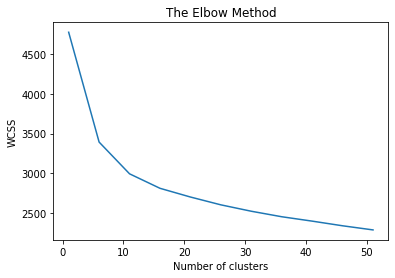

In [116]:
plt.plot(range(1, 55, 5), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [219]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_transform(X_train)
fitted=kmeans.fit(y_kmeans)
prediction=kmeans.predict(y_kmeans)


0
1
2


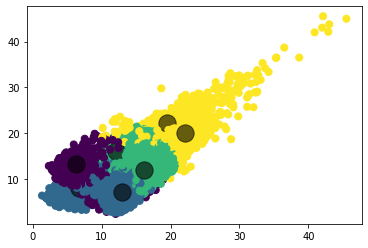

In [163]:
for i in range(0,3) :
    print(i)
    x=y_kmeans[: ,i]
    y= y_kmeans[: ,i+1]
    plt.scatter(x, y,c=prediction,s=50 , cmap='viridis')

    centers2 = fitted.cluster_centers_
    plt.scatter(centers2[:, i], centers2[:, i+1],c='black', s=300, alpha=0.6)
 


In [204]:
y_kmeans[:, 4]

IndexError: index 4 is out of bounds for axis 1 with size 4

In [ ]:
for i in range(0,4):
    if i==3:
        d+=1
        c=1
        

In [ ]:
y_kmeans[:,]

0
0
0
1
1
0
1
1


IndexError: index 2 is out of bounds for axis 0 with size 2

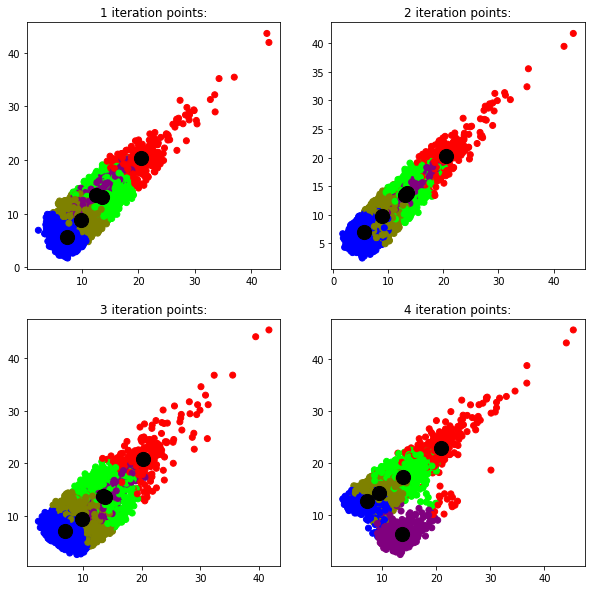

In [220]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
kmeans = KMeans(n_clusters=5,random_state=0,max_iter=i+1)
kmeans.fit(y_kmeans)

fig, ax = plt.subplots(nrows=2, ncols=2,figsize=(10,10))

from sklearn.cluster import KMeans
c=d=0
for i in range(0,5):
    
    ax[c,d].title.set_text(f"{i+1} iteration points:")

    centroids=kmeans.cluster_centers_
    print(c)
    print(d)
    #print(y_kmeans[:, i+1])
    
    ax[c,d].scatter(y_kmeans[: ,i],y_kmeans[: ,i+1],c=prediction,cmap='brg')
    
    ax[c,d].scatter(kmeans.cluster_centers_[:, i], kmeans.cluster_centers_[:, i+1], s=200, c='black')
    
    d+=1
    if d==2:
        c+=1
        d=0

First iteration points:


Second iteration points:


Third iteration points:


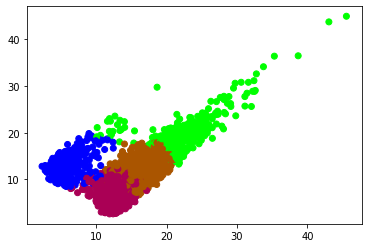

Forth iteration points:


IndexError: index 4 is out of bounds for axis 1 with size 4

In [130]:
from sklearn.cluster import KMeans

print("First iteration points:")
kmeans = KMeans(n_clusters=4,random_state=0,max_iter=1)
kmeans.fit(y_kmeans)
centroids=kmeans.cluster_centers_

plt.scatter(y_kmeans[:,0],y_kmeans[:,1],c=prediction,cmap='brg')

plt.show()


print("Second iteration points:")
kmeans = KMeans(n_clusters=4,random_state=0,max_iter=2)
kmeans.fit(y_kmeans)

plt.scatter(y_kmeans[:,1],y_kmeans[:,2],c=prediction,cmap='brg')

plt.show()


print("Third iteration points:")
kmeans = KMeans(n_clusters=4,random_state=0,max_iter=3)
kmeans.fit(y_kmeans)

plt.scatter(y_kmeans[:,2],y_kmeans[:,3],c=prediction,cmap='brg')

plt.show()


print("Forth iteration points:")
kmeans = KMeans(n_clusters=4,random_state=0,max_iter=4)
kmeans.fit(y_kmeans)


plt.scatter(y_kmeans[:,3],y_kmeans[:,4],c=prediction,cmap='brg')

plt.show()


In [33]:
words = M_S["words"]

In [34]:
split_MS = split_MS.join(words)
split_MS

0         1         2         3         4         5         6  \
0    -0.023543  0.306355 -0.184573 -0.068203  0.353079 -0.062772 -0.348420   
1     0.129031  0.642105 -0.016931 -0.069175  0.447029  0.076888 -0.515235   
2     0.336914  0.448239 -0.078211 -0.171765  0.374772 -0.109130 -0.447899   
3     0.211377  0.497411 -0.401752 -0.047627  0.442297 -0.165710 -0.326031   
4     0.383194  0.864817 -0.404187 -0.270395  0.695146 -0.187954 -0.448007   
...        ...       ...       ...       ...       ...       ...       ...   
5177  0.123252  0.200820 -0.119522 -0.087230  0.148089 -0.085904 -0.227156   
5178  0.132935  0.281443 -0.075526 -0.092238  0.133795 -0.013040 -0.299209   
5179  0.229605  0.278728 -0.055178 -0.092065  0.199455 -0.065839 -0.345209   
5180  0.235408  0.204669 -0.108253 -0.112333  0.147104 -0.084240 -0.155288   
5181  0.028850  0.269080  0.041193 -0.041302  0.170846  0.070751 -0.192750   

             7         8         9  ...        91        92        93  \
0    -0.156604  0.267946  0.311738  ...  0.130375  0.220033 -0.076821   
1    -0.240417 -0.100084  0.289204  ...  0.161450  0.551106 -0.170123   
2    -0.398967  0.043329  0.135965  ...  0.104978  0.209953  0.031424   
3     0.038388  0.192583  0.226468  ... -0.109817  0.378722  0.120784   
4    -0.512741  0.002909  0.102220  ...  0.223845  0.287978  0.148082   
...        ...       ...       ...  ...       ...       ...       ...   
5177 -0.155646  0.063249  0.164278  ... -0.059426  0.257136 -0.051312   
5178 -0.118583  0.066720  0.192708  ... -0.097401  0.217646 -0.108868   
5179 -0.216514 -0.033481  0.187823  ... -0.011402  0.224856 -0.056993   
5180  0.006501 -0.056391  0.065872  ... -0.005530  0.377602  0.053287   
5181 -0.191160  0.068656  0.117886  ...  0.129749  0.162201 -0.047411   

            94        95        96        97        98        99     words  
0     0.053604 -0.163064  0.080668  0.314072 -0.307872 -0.186968      </s>  
1    -0.106737 -0.021235 -0.031499  0.216599 -0.246787 -0.281712        im  
2    -0.141593  0.118982  0.184276  0.297749  0.038809 -0.231632      know  
3     0.108962 -0.217444 -0.136654  0.305047 -0.262678 -0.375599        oh  
4     0.006101  0.124745 -0.003283  0.365103  0.080830 -0.168062      dont  
...        ...       ...       ...       ...       ...       ...       ...  
5177  0.049091 -0.111945 -0.056579  0.103533 -0.203072 -0.172625    doobie  
5178 -0.058122 -0.057875  0.068319  0.098527 -0.147906 -0.237621       pep  
5179 -0.071494 -0.042209  0.058802  0.041080 -0.124589 -0.189075  pretzels  
5180  0.105462 -0.213121 -0.049329  0.113260 -0.229663 -0.155453   flashed  
5181 -0.118018 -0.088206  0.029672  0.082765 -0.126706 -0.264851  ceilings  

[5182 rows x 101 columns]

In [35]:
split_MS['CLUSTERS'] = kmeans.labels_
split_MS.to_csv("cluster_ft_vectors.csv",index=False)

In [36]:
split_MS

0         1         2         3         4         5         6  \
0    -0.023543  0.306355 -0.184573 -0.068203  0.353079 -0.062772 -0.348420   
1     0.129031  0.642105 -0.016931 -0.069175  0.447029  0.076888 -0.515235   
2     0.336914  0.448239 -0.078211 -0.171765  0.374772 -0.109130 -0.447899   
3     0.211377  0.497411 -0.401752 -0.047627  0.442297 -0.165710 -0.326031   
4     0.383194  0.864817 -0.404187 -0.270395  0.695146 -0.187954 -0.448007   
...        ...       ...       ...       ...       ...       ...       ...   
5177  0.123252  0.200820 -0.119522 -0.087230  0.148089 -0.085904 -0.227156   
5178  0.132935  0.281443 -0.075526 -0.092238  0.133795 -0.013040 -0.299209   
5179  0.229605  0.278728 -0.055178 -0.092065  0.199455 -0.065839 -0.345209   
5180  0.235408  0.204669 -0.108253 -0.112333  0.147104 -0.084240 -0.155288   
5181  0.028850  0.269080  0.041193 -0.041302  0.170846  0.070751 -0.192750   

             7         8         9  ...        92        93        94  \
0    -0.156604  0.267946  0.311738  ...  0.220033 -0.076821  0.053604   
1    -0.240417 -0.100084  0.289204  ...  0.551106 -0.170123 -0.106737   
2    -0.398967  0.043329  0.135965  ...  0.209953  0.031424 -0.141593   
3     0.038388  0.192583  0.226468  ...  0.378722  0.120784  0.108962   
4    -0.512741  0.002909  0.102220  ...  0.287978  0.148082  0.006101   
...        ...       ...       ...  ...       ...       ...       ...   
5177 -0.155646  0.063249  0.164278  ...  0.257136 -0.051312  0.049091   
5178 -0.118583  0.066720  0.192708  ...  0.217646 -0.108868 -0.058122   
5179 -0.216514 -0.033481  0.187823  ...  0.224856 -0.056993 -0.071494   
5180  0.006501 -0.056391  0.065872  ...  0.377602  0.053287  0.105462   
5181 -0.191160  0.068656  0.117886  ...  0.162201 -0.047411 -0.118018   

            95        96        97        98        99     words  CLUSTERS  
0    -0.163064  0.080668  0.314072 -0.307872 -0.186968      </s>         1  
1    -0.021235 -0.031499  0.216599 -0.246787 -0.281712        im         1  
2     0.118982  0.184276  0.297749  0.038809 -0.231632      know         1  
3    -0.217444 -0.136654  0.305047 -0.262678 -0.375599        oh         4  
4     0.124745 -0.003283  0.365103  0.080830 -0.168062      dont         4  
...        ...       ...       ...       ...       ...       ...       ...  
5177 -0.111945 -0.056579  0.103533 -0.203072 -0.172625    doobie         3  
5178 -0.057875  0.068319  0.098527 -0.147906 -0.237621       pep         3  
5179 -0.042209  0.058802  0.041080 -0.124589 -0.189075  pretzels         3  
5180 -0.213121 -0.049329  0.113260 -0.229663 -0.155453   flashed         0  
5181 -0.088206  0.029672  0.082765 -0.126706 -0.264851  ceilings         3  

[5182 rows x 102 columns]

In [37]:
df = split_MS[['words', 'CLUSTERS']].copy()
df

words  CLUSTERS
0         </s>         1
1           im         1
2         know         1
3           oh         4
4         dont         4
...        ...       ...
5177    doobie         3
5178       pep         3
5179  pretzels         3
5180   flashed         0
5181  ceilings         3

[5182 rows x 2 columns]

In [38]:
df.to_csv("cluster_ft_vectors.csv",index=False)

CLUSTER no.0


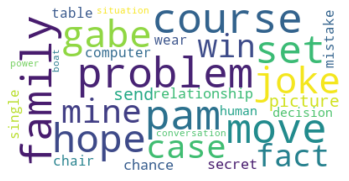

CLUSTER no.1


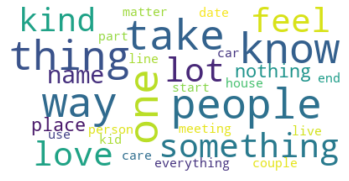

CLUSTER no.2


CLUSTER no.3


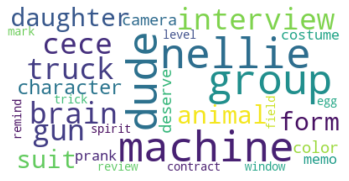

CLUSTER no.4


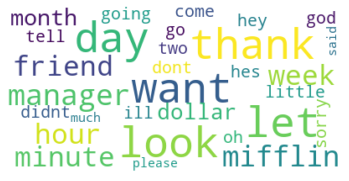

In [39]:
for i in range(0,5):
    word=" ".join(word for word in (df[df['CLUSTERS']==i].words.values))
    WC = WordCloud(max_font_size=50, max_words=30, background_color="White").generate(word)
    print('CLUSTER no.{}'.format(i))
    plt.imshow(WC, interpolation = 'bilinear') 
    plt.axis('off')
    plt.show()
    i+=1


In [40]:
sentence_data = pd.read_csv("MSL.csv")
sentence_data 

msg_lower
0      all right jim your quarterlies look very good ...
1                    oh i told you i couldnt close it so
2      so youve come to the master for guidance is th...
3                actually you called me in here but yeah
4            all right well let me show you how its done
...                                                  ...
54156  it all seems so very arbitrary i applied for a...
54157  i just feel lucky that i got a chance to share...
54158  im happy that this was all filmed so i can rem...
54159  i sold paper at this company for 12 years my j...
54160  i thought it was weird when you picked us to m...

[54161 rows x 1 columns]